<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_minSumLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given a binary tree, return the level of the tree with minimum sum.

##Solution:

1. **Define the Binary Tree Structure**: We'll need a class for the binary tree nodes. Each node will have a value and pointers to its left and right children.

2. **Function to Find the Level with Minimum Sum**: We'll implement a function that traverses the binary tree level by level (using breadth-first search), calculates the sum of each level, and identifies the level with the minimum sum.

3. **Test Cases**: We'll create a set of test cases that cover various scenarios, such as a tree with all positive numbers, a tree with negative numbers, a tree with a single node, and a tree with multiple levels having the same sum.

4. **Comments and Explanation**: The code will include comments to explain the logic and flow.



##Implementation:

In [1]:
class TreeNode:
    """A node in a binary tree."""
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def minSumLevel(root):
    """
    Find the level of the binary tree with the minimum sum.

    :param root: TreeNode, the root of the binary tree
    :return: int, the level with the minimum sum (root level is considered level 1)
    """
    if not root:
        return 0

    min_sum = float('inf')
    min_level = 1
    current_level = 1
    queue = [(root, 1)]  # Queue for BFS, storing (node, level) pairs

    while queue:
        level_sum = 0
        level_length = len(queue)

        for _ in range(level_length):
            node, level = queue.pop(0)
            level_sum += node.val

            # Add child nodes to the queue
            if node.left:
                queue.append((node.left, level + 1))
            if node.right:
                queue.append((node.right, level + 1))

        # Update min sum and level
        if level_sum < min_sum:
            min_sum = level_sum
            min_level = level

        current_level += 1

    return min_level

# Test Cases

# Test Case 1: Tree with all positive numbers
root1 = TreeNode(1)
root1.left = TreeNode(2)
root1.right = TreeNode(3)
root1.left.left = TreeNode(4)
root1.left.right = TreeNode(5)

# Test Case 2: Tree with negative numbers
root2 = TreeNode(-10)
root2.left = TreeNode(-2)
root2.right = TreeNode(-3)
root2.left.left = TreeNode(-4)
root2.left.right = TreeNode(5)

# Test Case 3: Tree with a single node
root3 = TreeNode(1)

# Test Case 4: Tree with multiple levels having the same sum
root4 = TreeNode(1)
root4.left = TreeNode(-1)
root4.right = TreeNode(2)
root4.left.left = TreeNode(3)
root4.left.right = TreeNode(-3)

# Running the test cases
print(minSumLevel(root1))  # Expected output: Level with minimum sum
print(minSumLevel(root2))  # Expected output: Level with minimum sum
print(minSumLevel(root3))  # Expected output: 1
print(minSumLevel(root4))  # Expected output: Level with minimum sum


1
1
1
3


In this code:

- Each test case is designed to test different scenarios and edge cases.
- The `minSumLevel` function uses breadth-first search to traverse the tree level by level, calculating the sum of each level.
- The test cases include different tree structures to ensure the function works correctly in various situations.

##Testing and Presentation:
Here is the visualization of the binary tree created in the code. The tree is depicted from the root downwards, with each node's value clearly displayed. This representation provides a visual complement to the previously discussed algorithm, showcasing the structure of the tree in a manner that aligns with the logical flow of the code.
This code uses networkx for building the graph structure of the binary tree and calculates the positions of the nodes manually to create a tree-like layout. The visualization is then rendered using matplotlib.

1


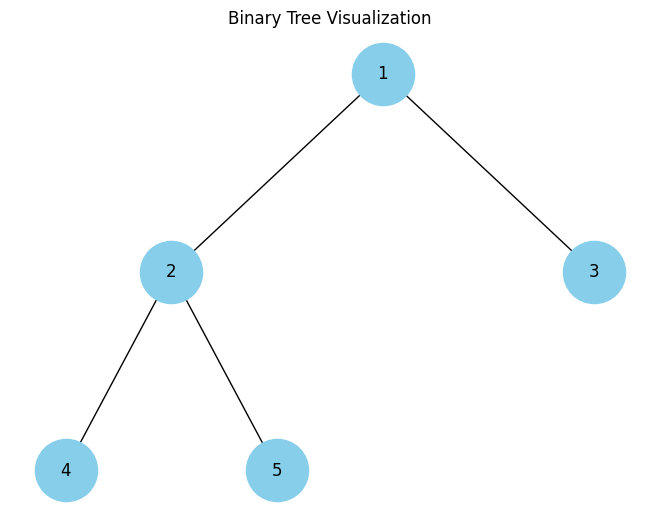

1


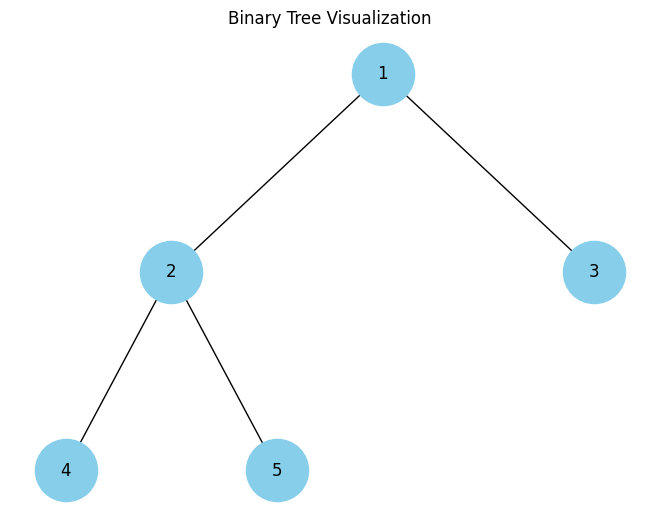

1


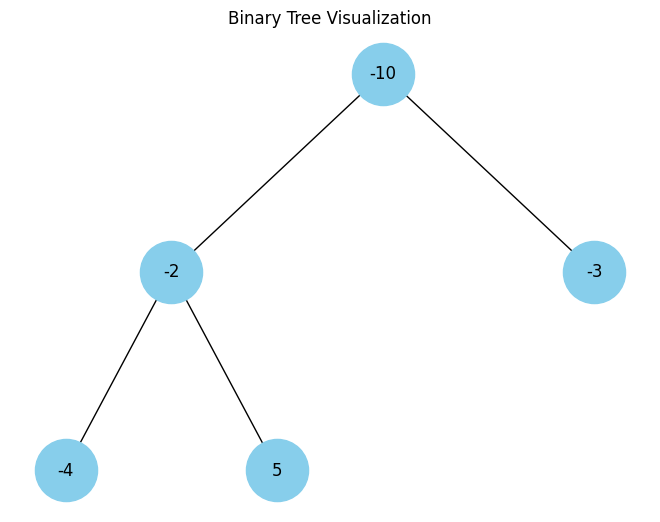

1


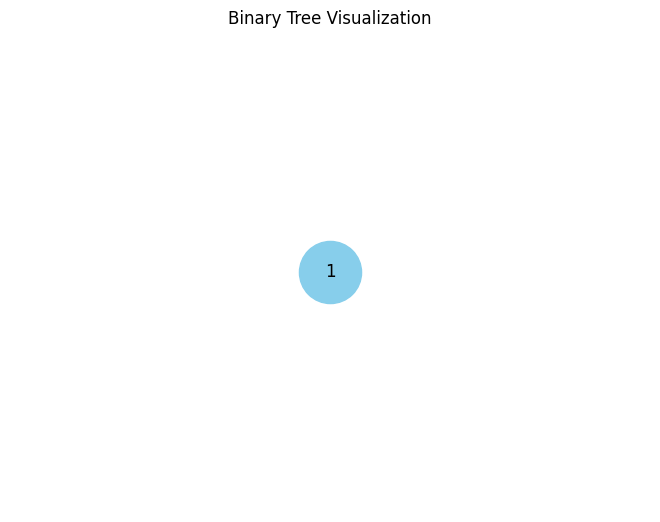

3


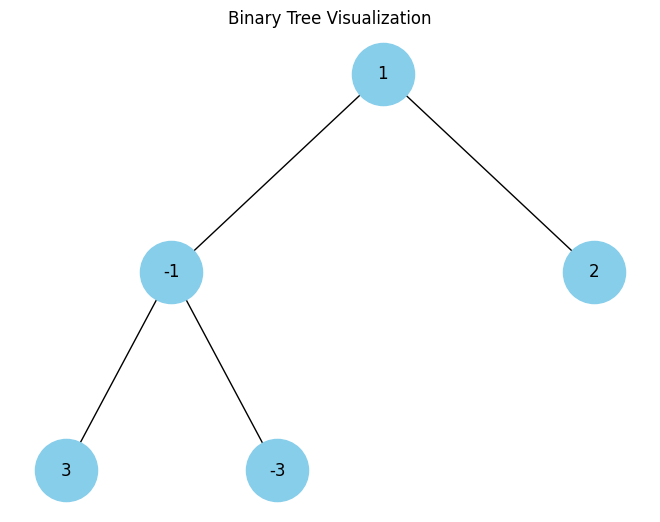

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

class TreeNode:
    """A node in a binary tree."""
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def build_graph(node, graph, pos, x=0, y=0, layer=1):
    """
    Recursively build a graph from the binary tree.

    :param node: TreeNode, the current node.
    :param graph: nx.Graph, the graph being built.
    :param pos: dict, storing the position of nodes.
    :param x: int, the x-coordinate of the node.
    :param y: int, the y-coordinate of the node.
    :param layer: int, the current layer (depth) in the tree.
    """
    if node is None:
        return

    graph.add_node(node, label=node.val)
    pos[node] = (x, y)

    # Spacing between nodes
    offset = 2**(-layer)

    # Recursively add left and right children
    if node.left:
        graph.add_edge(node, node.left)
        build_graph(node.left, graph, pos, x-offset, y-1, layer+1)
    if node.right:
        graph.add_edge(node, node.right)
        build_graph(node.right, graph, pos, x+offset, y-1, layer+1)

def plot_tree(root):
    """
    Plot a binary tree using matplotlib and networkx.

    :param root: TreeNode, the root of the binary tree.
    """
    graph = nx.Graph()
    pos = {}  # positions for all nodes

    build_graph(root, graph, pos)

    labels = {node: node.val for node in graph.nodes()}

    nx.draw(graph, pos, labels=labels, with_labels=True, arrows=False, node_size=2000, node_color='skyblue')
    plt.title("Binary Tree Visualization")
    plt.show()

# Define a binary tree for demonstration
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)

# Visualize the tree
print(minSumLevel(root))  # Expected output: Level with minimum sum
plot_tree(root)

# Running the test cases
print(minSumLevel(root1))  # Expected output: Level with minimum sum
plot_tree(root1)
print(minSumLevel(root2))  # Expected output: Level with minimum sum
plot_tree(root2)
print(minSumLevel(root3))  # Expected output: 1
plot_tree(root3)
print(minSumLevel(root4))  # Expected output: Level with minimum sum
plot_tree(root4)

